# Document Similarity using Tf-Idf Model - the J way

Tf-Idf / cosine similarity is a widely used technique in machine learning, information retrieval and text mining. The mathematical background of this method can be found in the so called "Vector Space Model" (VSM) which is an algebraic model, representing words as vectors.

This Jupyter Notebook ist based on: http://www.journalofj.com/index.php/vol-5-no-1-august-2017

### Tf-Idf / cosine similarity - explained in theory

The following description is extremely short and covers only a small part of the whole theory and background.

The common form of the Tf-Idf cosine similarity is:

$$
\begin{align}
similarity\_score = cos \theta = \frac{d \cdot q}{|d|\times |q|} = \frac{\sum_{i=1}^{n}{d_i q_i}}{\sqrt{\sum_{i=1}^{n}{d_i^2}}\sqrt{\sum_{i=1}^{n}{q_i^2}}} = \hat{d} \cdot q
\end{align}
$$

**where:**

$$
\begin{align}
d       &=   \text{document idf vector} \\
\hat{d} &=   \text{normalized document idf vector} \\
q       &=   \text{query / normalized idf search bow vector} \\
|d|     &=   \text{Length of d (extension of Pythagoras's theorem)} \\
|q|     &=   \text{Length of q (extension of Pythagoras's theorem)} \\
\cdot   &=   \text{Dot product of two vectors: } \sum_{i=1}^{n}{d_i q_i} \\
\times  &=   \text{Product of two numbers} \\
\end{align}
$$

**Graphical representation of the "cosine similarity":**

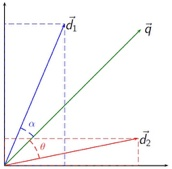

**Example:**

$$
\begin{align}
similarity_{txt : query} &= cos \theta \frac{corpus_{idfs} \cdot query_{normalized}}{|corpus_{idfs}| \times |query_{normalized}|} = 0.3857 \\\\
similarity_{txt : query} &= cos \theta \frac{
\begin{bmatrix}
1.0 & 0.0 & 0.415 & 0.415 & 0.0 & 0.0
\end{bmatrix} \cdot
\begin{bmatrix}
0.4472 & 0.8944 & 0.0 & 0.0 & 0.0 & 0.0
\end{bmatrix}
}{|\begin{bmatrix}
1.0 & 0.0 & 0.415 & 0.415 & 0.0 & 0.0
\end{bmatrix}| \times |\begin{bmatrix}
0.4472 & 0.8944 & 0.0 & 0.0 & 0.0 & 0.0
\end{bmatrix}|} \\\\
&= \frac{0.4472}{1.1595 \times 1.0000} \\\\
&= 0.3857
\end{align}
$$

### Some pre-requisites:

Before analyzing texts, it's a good idea to perform some pre-processing tasks such as eliminating punctuation characters like commas, periods, etc. After that, we convert the whole text to lowercase, and remove so called stop-words, such as "the", "is", etc. Stop- words are irrelevant for text analysis, because they do not contain any information of interest.

In [1]:
punc_chars =: ',;.:'
stop_words =: 'the';'is';'we';'can';'in'

### Documents (training set):

In [2]:
 txt_0 =: 'The sky is blue.'
 txt_1 =: 'The sun is bright.'
 txt_2 =: 'The sun in the sky is bright.'
 txt_3 =: 'We can see the shining sun, the bright sun.'
]txt_n =: txt_0;txt_1;txt_2;txt_3

┌────────────────┬──────────────────┬─────────────────────────────┬───────────────────────────────────────────┐
│The sky is blue.│The sun is bright.│The sun in the sky is bright.│We can see the shining sun, the bright sun.│
└────────────────┴──────────────────┴─────────────────────────────┴───────────────────────────────────────────┘


### Document to get the similarity score compared to txt_0-3 (test set):

In [3]:
search_text =: 'The sky is blue.'

### Question 1: What is the similarity score of search_text compared to txt_0 ?

In [4]:
search_text =: 'The sky is blue.'
txt_0       =: 'The sky is blue.'
search_text -: txt_0

1


This one was easy. search_text has a similarity score of 1.0 compared to txt_0, because search_text and txt_0 are the same.

### Question 2: What is the similarity score of search_text compared to txt_2 ?

In [5]:
search_text =: 'The sky is blue.'
txt_2       =: 'The sun in the sky is bright.'
search_text -: txt_2

0


This one is harder to determine using the naked eye, or a simple compare/match operator like -: (which returns simply 0 for "inequality"), but it's possible to calculate the similarity score by performing the following steps.

### Some utility verbs - or "first things first":

Before we really start the text analysis, let's define some utility verbs.

In [6]:
NB. Remove punc_chars from text in y
remove_punc_chars =: 3 : '(I. -. (a. i. y) e. (a. i. punc_chars)) { y'

NB. Remove stop_words from words in y
remove_stop_words =: 3 : 'stop_words -.~ y'

NB. Get indices of dictionary entries in y
get_dict_entries =: 3 : 'dict_words i. y'

NB. Classify each entry in y
classify_entries =: 3 : 'y ({. ; #) /. y'

NB. Get missing indices
get_missing_indices =: 3 : 'I. -. dict_words e. y'

NB. Prepare missing indices
prepare_missing_indices =: 3 : '|: (y) ,. (<0)'

NB. Prepare corpus
prepare_corpus =: 3 : '|:(]/:{"1)|:(>0{y),.(>1{y)'

NB. Get idf of a word in txt_n
get_idf =: 3 : '+/ 0 >~ (+/ |: -. (<y) i. >txt_n)'

NB. Normalize a vector
normalize =: 3 : 'y%(%:+/y^2)'

### Start:

In [7]:
]txt_n

┌────────────────┬──────────────────┬─────────────────────────────┬───────────────────────────────────────────┐
│The sky is blue.│The sun is bright.│The sun in the sky is bright.│We can see the shining sun, the bright sun.│
└────────────────┴──────────────────┴─────────────────────────────┴───────────────────────────────────────────┘


### Step 1:

Convert all words to lowercase.

In [8]:
NB. Convert all words to lower case
]txt_n =: tolower each txt_n

┌────────────────┬──────────────────┬─────────────────────────────┬───────────────────────────────────────────┐
│the sky is blue.│the sun is bright.│the sun in the sky is bright.│we can see the shining sun, the bright sun.│
└────────────────┴──────────────────┴─────────────────────────────┴───────────────────────────────────────────┘


### Step 2:

Remove punctuation characters.

In [9]:
NB. Remove punctuation characters
]txt_n =: remove_punc_chars each txt_n

┌───────────────┬─────────────────┬────────────────────────────┬─────────────────────────────────────────┐
│the sky is blue│the sun is bright│the sun in the sky is bright│we can see the shining sun the bright sun│
└───────────────┴─────────────────┴────────────────────────────┴─────────────────────────────────────────┘


### Step 3:

Split sentences into single words.

In [10]:
NB. Split sentences into single words
]txt_n =: cut each txt_n

┌─────────────────┬───────────────────┬──────────────────────────────┬───────────────────────────────────────────┐
│┌───┬───┬──┬────┐│┌───┬───┬──┬──────┐│┌───┬───┬──┬───┬───┬──┬──────┐│┌──┬───┬───┬───┬───────┬───┬───┬──────┬───┐│
││the│sky│is│blue│││the│sun│is│bright│││the│sun│in│the│sky│is│bright│││we│can│see│the│shining│sun│the│bright│sun││
│└───┴───┴──┴────┘│└───┴───┴──┴──────┘│└───┴───┴──┴───┴───┴──┴──────┘│└──┴───┴───┴───┴───────┴───┴───┴──────┴───┘│
└─────────────────┴───────────────────┴──────────────────────────────┴───────────────────────────────────────────┘


### Step 4:

Remove stop-words.

In [11]:
NB. Remove stop words
]txt_n =: remove_stop_words each txt_n

┌──────────┬────────────┬────────────────┬────────────────────────────┐
│┌───┬────┐│┌───┬──────┐│┌───┬───┬──────┐│┌───┬───────┬───┬──────┬───┐│
││sky│blue│││sun│bright│││sun│sky│bright│││see│shining│sun│bright│sun││
│└───┴────┘│└───┴──────┘│└───┴───┴──────┘│└───┴───────┴───┴──────┴───┘│
└──────────┴────────────┴────────────────┴────────────────────────────┘


### Step 5:

Create a dictionary that contains all words from all documents (without stop-words), and assign a unique id (top row) to each word.

In [12]:
NB. Create dictionary words array
]dict_words =: (~.(,/>txt_n))-.<''

┌───┬────┬───┬──────┬───┬───────┐
│sky│blue│sun│bright│see│shining│
└───┴────┴───┴──────┴───┴───────┘


In [13]:
NB. Create dictionary (each word gets a unique id)
]dictionary =: |:(;/i.#dict_words),.dict_words

┌───┬────┬───┬──────┬───┬───────┐
│0  │1   │2  │3     │4  │5      │
├───┼────┼───┼──────┼───┼───────┤
│sky│blue│sun│bright│see│shining│
└───┴────┴───┴──────┴───┴───────┘


### Step 6:

Build a corpus (bag of words), where txt_0-3 are represented by each words unique id from the dictionary, and the number of how many times a word/term appears in a document (the term frequency).

In [14]:
NB. Create corpus (bag of words, ids and number of occurence in text)
]corpus =: |: each classify_entries each get_dict_entries each txt_n

┌─────┬─────┬───────┬─────────┐
│┌─┬─┐│┌─┬─┐│┌─┬─┬─┐│┌─┬─┬─┬─┐│
││0│1│││2│3│││2│0│3│││4│5│2│3││
│├─┼─┤│├─┼─┤│├─┼─┼─┤│├─┼─┼─┼─┤│
││1│1│││1│1│││1│1│1│││1│1│2│1││
│└─┴─┘│└─┴─┘│└─┴─┴─┘│└─┴─┴─┴─┘│
└─────┴─────┴───────┴─────────┘


In [15]:
]fill_indices =: |: <"0 each > each (get_missing_indices each txt_n)

┌─────────┬─────────┬───────┬─────┐
│┌─┬─┬─┬─┐│┌─┬─┬─┬─┐│┌─┬─┬─┐│┌─┬─┐│
││2│3│4│5│││0│1│4│5│││1│4│5│││0│1││
│└─┴─┴─┴─┘│└─┴─┴─┴─┘│└─┴─┴─┘│└─┴─┘│
└─────────┴─────────┴───────┴─────┘


In [16]:
]fill_indices =: prepare_missing_indices each fill_indices

┌─────────┬─────────┬───────┬─────┐
│┌─┬─┬─┬─┐│┌─┬─┬─┬─┐│┌─┬─┬─┐│┌─┬─┐│
││2│3│4│5│││0│1│4│5│││1│4│5│││0│1││
│├─┼─┼─┼─┤│├─┼─┼─┼─┤│├─┼─┼─┤│├─┼─┤│
││0│0│0│0│││0│0│0│0│││0│0│0│││0│0││
│└─┴─┴─┴─┘│└─┴─┴─┴─┘│└─┴─┴─┘│└─┴─┘│
└─────────┴─────────┴───────┴─────┘


Then calculate the "missing" indices, because not all documents contain all words from the dictionary. We fill-up the resulting vectors, so that each document vector contain all dictionary id's plus the corresponding term-frequency. The term-frequency may have a value of 0 (zero) if the dictionary-word does not appear in the document.

In [17]:
]corpus =: corpus,.fill_indices

┌─────────┬─────────┐
│┌─┬─┐    │┌─┬─┬─┬─┐│
││0│1│    ││2│3│4│5││
│├─┼─┤    │├─┼─┼─┼─┤│
││1│1│    ││0│0│0│0││
│└─┴─┘    │└─┴─┴─┴─┘│
├─────────┼─────────┤
│┌─┬─┐    │┌─┬─┬─┬─┐│
││2│3│    ││0│1│4│5││
│├─┼─┤    │├─┼─┼─┼─┤│
││1│1│    ││0│0│0│0││
│└─┴─┘    │└─┴─┴─┴─┘│
├─────────┼─────────┤
│┌─┬─┬─┐  │┌─┬─┬─┐  │
││2│0│3│  ││1│4│5│  │
│├─┼─┼─┤  │├─┼─┼─┤  │
││1│1│1│  ││0│0│0│  │
│└─┴─┴─┘  │└─┴─┴─┘  │
├─────────┼─────────┤
│┌─┬─┬─┬─┐│┌─┬─┐    │
││4│5│2│3│││0│1│    │
│├─┼─┼─┼─┤│├─┼─┤    │
││1│1│2│1│││0│0│    │
│└─┴─┴─┴─┘│└─┴─┘    │
└─────────┴─────────┘


In [18]:
NB. Finally we build the corpus as we use it for calculation.
]corpus =: <"2 prepare_corpus"1 corpus

┌─────────────┬─────────────┬─────────────┬─────────────┐
│┌─┬─┬─┬─┬─┬─┐│┌─┬─┬─┬─┬─┬─┐│┌─┬─┬─┬─┬─┬─┐│┌─┬─┬─┬─┬─┬─┐│
││0│1│2│3│4│5│││0│1│2│3│4│5│││0│1│2│3│4│5│││0│1│2│3│4│5││
│├─┼─┼─┼─┼─┼─┤│├─┼─┼─┼─┼─┼─┤│├─┼─┼─┼─┼─┼─┤│├─┼─┼─┼─┼─┼─┤│
││1│1│0│0│0│0│││0│0│1│1│0│0│││1│0│1│1│0│0│││0│0│2│1│1│1││
│└─┴─┴─┴─┴─┴─┘│└─┴─┴─┴─┴─┴─┘│└─┴─┴─┴─┴─┴─┘│└─┴─┴─┴─┴─┴─┘│
└─────────────┴─────────────┴─────────────┴─────────────┘


Let's have a closer look at the corpus, for example the last cell ...

In [19]:
3 { corpus

┌─────────────┐
│┌─┬─┬─┬─┬─┬─┐│
││0│1│2│3│4│5││
│├─┼─┼─┼─┼─┼─┤│
││0│0│2│1│1│1││
│└─┴─┴─┴─┴─┴─┘│
└─────────────┘


... which corresponds to:

In [20]:
]txt_3

We can see the shining sun, the bright sun.


Without stop-words and punctuation characters and split into single words:

In [21]:
remove_stop_words cut remove_punc_chars tolower txt_3

┌───┬───────┬───┬──────┬───┐
│see│shining│sun│bright│sun│
└───┴───────┴───┴──────┴───┘


So the meaning of the last corpus cell is as follows:

In [22]:
dictionary , 1{>3{corpus

┌───┬────┬───┬──────┬───┬───────┐
│0  │1   │2  │3     │4  │5      │
├───┼────┼───┼──────┼───┼───────┤
│sky│blue│sun│bright│see│shining│
├───┼────┼───┼──────┼───┼───────┤
│0  │0   │2  │1     │1  │1      │
└───┴────┴───┴──────┴───┴───────┘


Row 1 = Dictionary IDs

Row 2 = Dictionary Words

Row 3 = Word Frequency

In fact, we only need the "Word Frequency" row. The rest is just for clarification.

### Step 7:

Create a bag of words (bow) for the test set (search_list), similar to the corpus from step 6.

In [23]:
NB. Prepare search_text
]search_text =: tolower search_text

the sky is blue.


In [24]:
]search_text =: remove_punc_chars search_text

the sky is blue


In [25]:
]search_list =: cut search_text

┌───┬───┬──┬────┐
│the│sky│is│blue│
└───┴───┴──┴────┘


In [26]:
]search_list =: remove_stop_words search_list

┌───┬────┐
│sky│blue│
└───┴────┘


In [27]:
NB. Create search bow
]search_bow =: |: classify_entries I. dict_words e. search_list

┌─┬─┐
│0│1│
├─┼─┤
│1│1│
└─┴─┘


In [28]:
]fill_bow =: get_missing_indices search_list

2 3 4 5


In [29]:
]fill_bow =: |:(<"0 fill_bow),.(#fill_bow)$(<0)

┌─┬─┬─┬─┐
│2│3│4│5│
├─┼─┼─┼─┤
│0│0│0│0│
└─┴─┴─┴─┘


In [30]:
]search_bow =: search_bow,.fill_bow

┌─┬─┬─┬─┬─┬─┐
│0│1│2│3│4│5│
├─┼─┼─┼─┼─┼─┤
│1│1│0│0│0│0│
└─┴─┴─┴─┴─┴─┘


In [31]:
]search_bow =: |: (]/:{"1) |: search_bow

┌─┬─┬─┬─┬─┬─┐
│0│1│2│3│4│5│
├─┼─┼─┼─┼─┼─┤
│1│1│0│0│0│0│
└─┴─┴─┴─┴─┴─┘


### Step 8:

Extract document vectors from corpus, and the search bow vector from search_bow.

In [32]:
NB. Extract corpus bow vectors
]corpvect =: ((#txt_n),(#dict_words)) $ (1{,./ >> each corpus)

1 1 0 0 0 0
0 0 1 1 0 0
1 0 1 1 0 0
0 0 2 1 1 1


In [33]:
NB. Extract search bow vector
]searvect =: >1{search_bow

1 1 0 0 0 0


### Step 9:

Calculate the inverse document frequency (idf) of each word/term. The idf is calculated by determining in how many documents (txt_0-3) does word_n appear?

Question: In how many documents does word_0 (sky) appear?

Answer: word_0 (sky) appears in 2 documents (txt_0 & txt_2).

Doing this for all words/terms, results in:

In [34]:
NB. Calculate inverse document frequency for each word in NB. dictionary
]idfs =: > get_idf each dict_words

2 1 3 3 1 1


### Step 10:

Calculate the idf weight for each word/term using the formula:

$$
\begin{align}
w = log_2 \frac{n}{f}
\end{align}
$$

**where:**

$$
\begin{align}
w &= \text{weight} \\
n &= \text{number of documents} \\
f &= \text{inverse document frequency} \\
\end{align}
$$

Doing this for all words/terms in idfs, results in:

In [35]:
NB. Calculate the idf weight
]idfs =: 2^.(#txt_n)%idfs

1 2 0.415037 0.415037 2 2


### Step 11:

Multiply each term frequency in the search bow with the inverse document frequency weight calculated in step 10.

$$
\begin{align}
(0,1) \Rightarrow 1 \times idfs[0] &= 1 \times 1.0 = 1.0 \Rightarrow (0,1.0) \\
(1,1) \Rightarrow 1 \times idfs[1] &= 1 \times 2.0 = 2.0 \Rightarrow (1,2.0)
\end{align}
$$

Then normalize the resulting vector using the formula:

$$
\begin{align}
n_1 = \frac{w_1}{\sqrt{w_1^2 + w_2^2 + ... + w_n^2}}
\end{align}
$$

**Example:**

$$
\begin{align}
n_0 = \frac{1.0}{\sqrt{1.0^2 + 2.0^2}} = 0.4472135954999579
\end{align}
$$

$$
\begin{align}
n_1 = \frac{2.0}{\sqrt{1.0^2 + 2.0^2}} = 0.8944271909999159
\end{align}
$$

In [36]:
NB. Calculate tfidf vector
]tfidf_vect =: normalize (searvect * idfs)

0.447214 0.894427 0 0 0 0


### Step 12:

Calculate the corpus idfs.

In [37]:
NB. Calculate corpus idfs
]corpus_idfs =: corpvect *"1 idfs

1 2        0        0 0 0
0 0 0.415037 0.415037 0 0
1 0 0.415037 0.415037 0 0
0 0 0.830075 0.415037 2 2


### Step 13:

Normalize all vectors in corpus_idfs using the formula from step 11.

In [38]:
NB. Calculate normalized corpus idfs
]norm_idfs =: normalize"1 corpus_idfs

0.447214 0.894427        0        0        0        0
       0        0 0.707107 0.707107        0        0
0.862418        0 0.357936 0.357936        0        0
       0        0 0.278849 0.139424 0.671865 0.671865


### Step 14:

Calculate the cosine similarity (score value), which is the dot product of each vector (row) in corpus_idfs and tfidf_vect, the query/search vector.

In [39]:
NB. Calculate cosine similarity
]cosine_similarity =: +/ |: norm_idfs *"1 tfidf_vect

1 0 0.385685 0


### Step 15:

Finally we create a nice and human readable output from the resulting vector of step 14. That means, the query "The sky is blue" matches the documents (txt_0-3) as follows:

In [40]:
NB. Create nice output
]docsim =: ('Document (txt_n)';'Similarity Score'),((<"0 i.#cosine_similarity),.(<"0 cosine_similarity))

┌────────────────┬────────────────┐
│Document (txt_n)│Similarity Score│
├────────────────┼────────────────┤
│0               │1               │
├────────────────┼────────────────┤
│1               │0               │
├────────────────┼────────────────┤
│2               │0.385685        │
├────────────────┼────────────────┤
│3               │0               │
└────────────────┴────────────────┘
